In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
# ongoing issues with hvplot
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [11]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [4]:
# Get the data from hvplot
plot_data = df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90,
    return_type='matplotlib'
)

---

### Prepare the Data

In [9]:
coin_ids = df_market_data.index

In [10]:
print(coin_ids)
print(len(coin_ids))

Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')
41


In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [11]:
len(scaled_data)

41

In [15]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data

scaled_data_df = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Set the coinid column as index
scaled_data_df = scaled_data_df.set_index(coin_ids)

# Display sample data
scaled_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [16]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [ ]:
# Create an empty list to store the inertia values
intertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(scaled_data_df)
    intertia_values.append(model.inertia_)

In [67]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_original = {"k": k_values, "inertia": intertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_original = pd.DataFrame(elbow_data_original)

In [68]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_original.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values
)

:Curve   [k]   (inertia)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

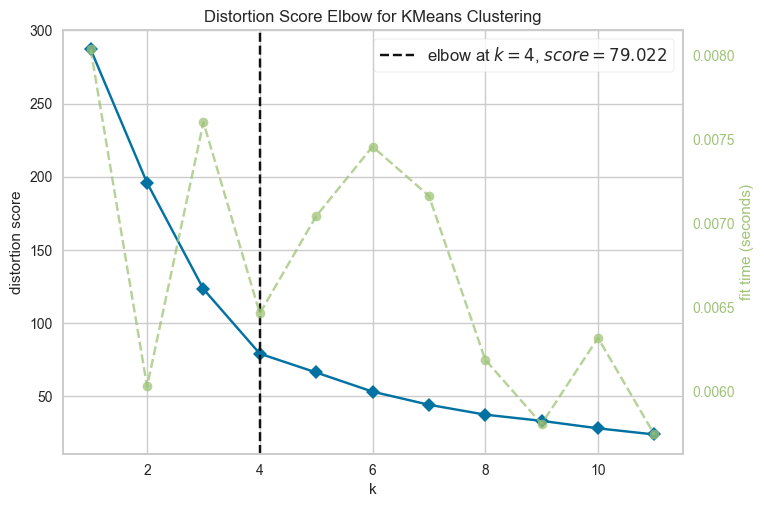

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# elbow curve using yellow brick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(scaled_data_df)       
visualizer.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Best value is k=4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [24]:
# Initialise the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=0)

In [26]:
# Fit the K-Means model using the scaled data
k_model.fit(scaled_data_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = k_model.predict(scaled_data_df)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [28]:
# Create a copy of the DataFrame
scaled_data_df_copy = scaled_data_df.copy()

In [31]:
# Add a new column to the DataFrame with the predicted clusters
scaled_data_df_copy['clusters'] = predictions

# Display sample data
scaled_data_df_copy.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [36]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scaled_data_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols="coin_id"
)

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In retrospect clusters of k=3 may have been better the data point that falls in to cluster group 3 does not make sense

In [33]:
k_model_3 = KMeans(n_clusters=3, random_state=0)
k_model_3.fit(scaled_data_df)
predictions_3 = k_model_3.predict(scaled_data_df)
scaled_data_df_copy['clusters_k3'] = predictions_3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
scaled_data_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters_k3",
    hover_cols="coin_id"
)

:NdOverlay   [clusters_k3]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

oh no this is worse haha, stick with k=4

---

### Optimise Clusters with Principal Component Analysis.

In [38]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [41]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
scaled_data_pca = pca.fit_transform(scaled_data_df)

# View the first five rows of the DataFrame. 
print(scaled_data_pca[:5])
print(len(scaled_data_pca))

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]
41


In [42]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [43]:
total_explained_variance = 0.3719856 + 0.34700813 + 0.17603793
total_explained_variance

0.89503166

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
The total explained variance is 0.895.
This means that almost 90% of the variaion in the data is explained for by our PCA model which is good!
Each individual values describes the propotion of variation in the data that each principle component accounts for

In [46]:
print(len(scaled_data_pca))

41


In [47]:
# Create a new DataFrame with the PCA data.
# Copy the crypto names from the original data
# Set the coinid column as index
pca_df = pd.DataFrame(
    scaled_data_pca,
    columns=["PC1", "PC2", "PC3"],
    index=coin_ids
)

# Display sample data
pca_df.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [50]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [52]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pca_df)
    inertia.append(model.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [69]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [70]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

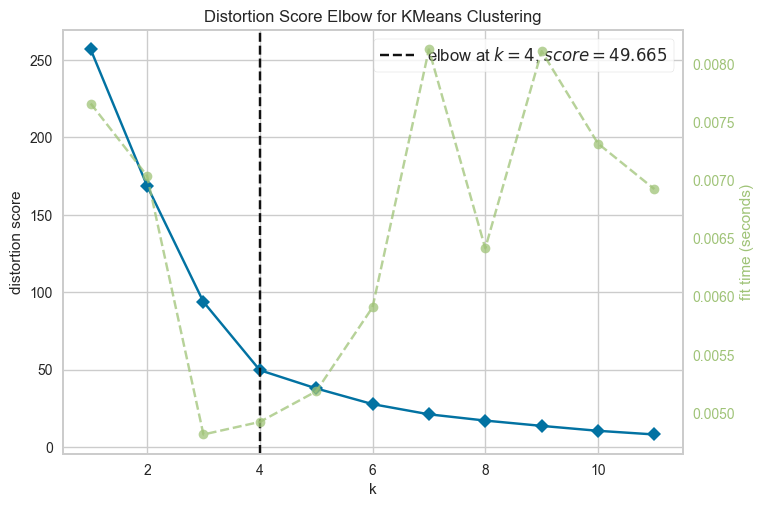

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# elbow curve using yellow brick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(pca_df)       
visualizer.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No previously we used k=4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [56]:
# Initialise the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [57]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [58]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predictions_k4 = model.predict(pca_df)
# Print the resulting array of cluster values.
print(pca_predictions_k4)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [59]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['k4_clusters'] = pca_predictions_k4

# Display sample data
pca_df_copy.head()

,PC1,PC2,PC3,k4_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [60]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="k4_clusters",
    hover_cols="coin_id"
)

:NdOverlay   [k4_clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [71]:
# Composite plot to contrast the Elbow curves
# create a line plot with the original data elbow curve
# create a line plot with the PCA data elbow curve
# create a composite plot using hvplot to compare the elbow curve from original data vs PCA data

df_elbow_original.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values
) * df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values
)

:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [74]:
# Composite plot to contrast the clusters


scaled_data_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    label="Original Data",
    hover_cols="coin_id"
) * pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    label="PCA Data",
    hover_cols="coin_id"
)


:Overlay
   .Scatter.Original_Data :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .Scatter.PCA_Data      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  PCA model with fewer features is easier to interpret, the difference in the data points are more easily visualised by their distance from one another. Ultimately we found the same number of clusters to be suitable, but note that sometimes this too can change with feature reduction.